In [4]:
%load_ext autoreload
%autoreload 2
import sys, networkx as nx, matplotlib.pyplot as plt
sys.path.insert(0, '../')
from Models.potts import Potts
from Models.fastIsing import Ising
import numpy as np

n = 100
g = nx.grid_2d_graph(n, n)
model = Potts(g, agentStates = [0, 1, 2], memorySize = 5, delta = 10)
print(model.memory.base)
model.reset()
model.updateType = 'async'
model.t = .2
res = model.simulate(int(1e3))

print(model.memory.base)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[2 0 2 ... 1 0 0]
 [0 2 2 ... 0 0 1]
 [0 2 0 ... 1 2 1]
 [0 2 2 ... 2 0 1]
 [0 2 2 ... 2 1 2]]
[[2 2 2 ... 0 0 0]
 [0 2 2 ... 0 0 1]
 [0 2 2 ... 0 0 1]
 [0 2 2 ... 0 0 1]
 [0 2 2 ... 0 0 1]]


<IPython.core.display.Javascript object>


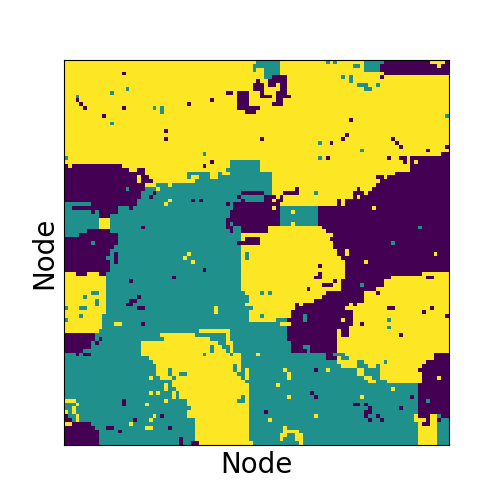

interactive(children=(IntSlider(value=0, description='time_step', max=999), Output()), _dom_classes=('widget-i…

In [5]:
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlabel('Node', fontsize = 20)
ax.set_ylabel('Node', fontsize = 20)
ax.set(xticks = [], yticks = [])
h = ax.imshow(res[0].reshape(n,n), aspect = 'equal')
def update(time_step = 0):
    try:
        h.set_data(res[time_step].reshape(n,n))
#     ax.set_title(f'Time = {time_step}')
        fig.canvas.draw()
    except Exception as e: print(e)
interact(update, time_step = widgets.IntSlider(min = 0, max = res.shape[0]-1, value = 0));

<IPython.core.display.Javascript object>


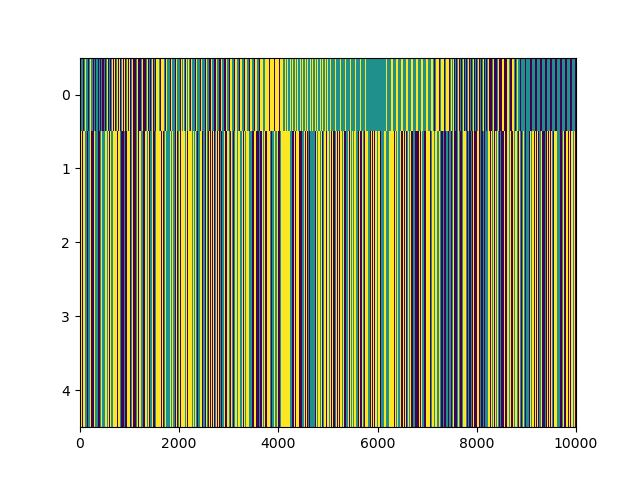

0.9168064512151768

In [3]:
fig, ax = plt.subplots()
ax.imshow(model.memory.base, aspect = 'auto')

np.exp(-1/-np.log(1e-5))